# Lecture 3: Motion of a Single Plasma Particle

<ins>Reference</ins>: Ch. 3, *Bellan, Paul M. Fundamentals of plasma physics. Cambridge university press, 2008.*

Now it is useful to generalize our result from Lecture 2 for applying the method to any given temporal and spatial dependent field $\mathbf{E}(\mathbf{x},t)$ and $\mathbf{B}(\mathbf{x},t)$.

We can write the equation of motion as

$$
\begin{align*}
\frac{d\mathbf{x}}{dt} &= \mathbf{v} \\
\frac{d\mathbf{v}}{dt} &= \frac{q}{m} \left( \mathbf{E}(\mathbf{x},t) + \mathbf{v} \times \mathbf{B}(\mathbf{x},t) \right)
\end{align*}
$$

Let us define a state vector $\mathbf{z} = (\mathbf{x},\mathbf{v})$ and a vector field $\mathbf{F}(\mathbf{z},t) = (\mathbf{v},\frac{q}{m} \left( \mathbf{E}(\mathbf{x},t) + \mathbf{v} \times \mathbf{B}(\mathbf{x},t) \right))$.

Then the equation of motion becomes

$$
\frac{d\mathbf{z}}{dt} = \mathbf{F}(\mathbf{z},t)
$$

This is a first order ordinary differential equation (ODE) with initial condition $\mathbf{z}(t_0) = \mathbf{z}_0$, which can be solved numerically using the method described in Lecture 2.

Let us pick an implicit leapfrog method for the time integration. The method is second order accurate in time and symplectic, which means that it conserves the phase space volume. The method, previously derived, is given by


$$
\begin{align*}
v_\text{new} &= \dfrac{\mathbf{C} + \mathbf{A} \mathbf{A} \cdot \mathbf{C} - \mathbf{A} \times \mathbf{C}}{1+ A^2}\\
x_\text{new} &= x_\text{old} + v_\text{new} \Delta t 
\end{align*}
$$

where $\mathbf{A} = \mathbf{\Omega} \Delta t/2$, $\mathbf{C} = v_\text{old} + \Delta t (\mathbf{\Sigma}  + v_\text{old} \times \mathbf{\Omega}/2)$, $\mathbf{\Omega} = q\mathbf{B}/m$, and $\mathbf{\Sigma} = q\mathbf{E}/m$.

## 3D visualization with ipympl

To see interactive plot in jupyter notebook, you can install ipympl
> pip install ipympl

In [1]:
# pip install ipympl

# Guiding Center Approximation

The guiding center approximation is a simplification used in plasma physics to simplify the analysis of charged particle motion in a magnetic field. It is particularly useful when the gyration (circular motion) of particles around magnetic field lines is much faster than their drift motion. The key idea is to treat the particle as if it moves along a "guiding center" trajectory, which represents the average motion of the particle over many gyration periods.

In the guiding center approximation, the four drift velocities mentioned earlier can be calculated using various mathematical techniques, including averaging over the gyration motion. This approximation allows researchers to describe the particle's motion more conveniently, making it easier to analyze and predict the behavior of particles in complex magnetic field configurations.

By using the guiding center approximation and considering the four drift velocities, scientists can gain valuable insights into the behavior of charged particles in plasmas and magnetic confinement devices, ultimately advancing our understanding of fusion energy research and other plasma-related phenomena.

<div style="text-align:center">
    <figure>
        <img src="gc.svg" alt="Guiding Center Illustration" style="width: 600px;background-color: #EEE;">
        <figcaption>Fig.1 Guiding Center</figcaption>
    </figure>
</div>

# Drift Theory

Drift theory is a framework used in plasma physics to describe the motion of charged particles in a magnetic field. It helps us understand how these particles move in addition to their gyration (circular motion) around magnetic field lines. Drift theory is particularly useful when analyzing the behavior of charged particles in a tokamak, a type of device used for controlled nuclear fusion research, or in other plasma confinement systems.

$$
\mathbf{v}_{\perp g c}=\mathbf{v}_E+\mathbf{v}_{\nabla B}+\mathbf{v}_c+\mathbf{v}_P
$$

In drift theory, there are four main drift velocities that describe particle motion:

1. **E × B Drift**:
   - Occurs due to the interaction between the electric field (E) and the magnetic field (B).
   - Particles experience a force perpendicular to both E and B, causing them to drift in a direction perpendicular to both E and B.

   $$\mathbf{v}_E=\frac{\mathbf{E} \times \mathbf{B}}{B^2}$$

2. **Grad B Drift**:
   - Results from spatial variations in the magnetic field strength (B).
   - Particles tend to drift from regions of lower magnetic field strength to regions of higher magnetic field strength.

   $$\mathbf{v}_{\nabla B}=-\frac{m v_{L 0}^2}{2 q B^3} \nabla B \times \mathbf{B}$$

3. **Curvature Drift**:
   - Arises when particles follow curved magnetic field lines.
   - Particles experience a drift motion perpendicular to the local curvature of the field lines.
   
   $$\mathbf{v}_c=-\frac{m v_{\| g c}^2}{q B^2} \widehat{B} \cdot \nabla \widehat{B} \times \mathbf{B}=\frac{1}{q B^2}\left(\frac{m v_{\| g c}^2 \hat{R}}{R}\right) \times \mathbf{B}$$

4. **Polarization Drift**:
   - A hgiher order drift velocity that arises from the time variation of the electric field (E) and magnetic field (B).
   
   $$\mathbf{v}_P=-\frac{m}{q B^2}\left[\frac{\mathrm{d}}{\mathrm{d} t}\left(\mathbf{v}_E+\mathbf{v}_{\nabla B}+\mathbf{v}_c\right)\right] \times \mathbf{B}$$

The four drift velocities described above play a crucial role in understanding the behavior of charged particles in magnetic fields, especially in complex plasma environments.

By using drift theory, we can gain valuable insights into various plasma phenomena and improve our understanding of fusion energy research and other applications of plasma physics.



In [2]:
import numpy as np
import pylab as pl

def update_velocity(v_old, E, B, dt):
    # Update velocity using implicit leapfrog method
    q_m = 5.0 # Charge-to-mass ratio
    Omega = q_m * B
    Sigma = q_m * E
    A = Omega * dt / 2
    C = v_old + dt * (Sigma + np.cross(v_old, Omega)/ 2)
    v_new = (C + A*(np.dot(A,C)-np.cross(A,C)))/(1+np.linalg.norm(A)**2)
    return v_new

def update_position(num_steps, dt, x0, v0, electric_field, magnetic_field):

    # Time array
    t = np.arange(0, num_steps * dt, dt)

    # Initialize arrays to store particle positions and velocities
    x = np.zeros((num_steps, 3))
    v = np.zeros((num_steps, 3))

    # Set initial conditions
    x[0] = x0
    v[0] = v0

    # Time integration loop using implicit leapfrog method
    for i in range(1, num_steps):
        E = electric_field(x[i - 1], t[i - 1])
        B = magnetic_field(x[i - 1], t[i - 1])
        
        # Update velocity using the Lorentz force equation
        v_new = update_velocity(v[i - 1], E, B, dt)
 
        # Update position
        x[i] = x[i - 1] + v_new * dt
        
        # Update velocity using updated position and magnetic field
        v[i] = v_new
    
    return x, v, t

def plot3D(x, title):
    # Plot 3D trajectory
    pl.close('all')
    %matplotlib widget
    fig = pl.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot3D(x[:, 0], x[:, 1], x[:, 2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    fig.canvas.header_visible = False
    pl.axis('equal')
    pl.title(title)
    pl.tight_layout()
    pl.show()

### Example 1: Uniform Electromagnetic Field

We consider a motion of a charged particle in a uniform electromagnetic field $\mathbf{E} = E_0 \hat{x}$ and $\mathbf{B} = B_0 \hat{z}$.

In [3]:
# Electric field function (customize as needed)
def electric_field(x, t):
    # Example: A uniform electric field in the x-direction
    Ex = 1.0
    Ey = 0.0
    Ez = 0.0
    return np.array([Ex, Ey, Ez])

# Magnetic field function (customize as needed)
def magnetic_field(x, t):
    # Example: A uniform magnetic field in the z-direction
    Bx = 0.0
    By = 0.0
    Bz = 1.0
    return np.array([Bx, By, Bz])

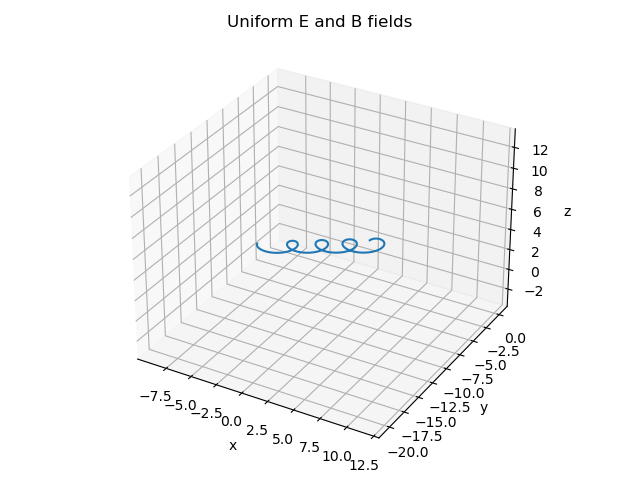

In [4]:
# Initial conditions
x0 = np.array([0.0, 0.0, 0.0])  # Initial position as a vector [x, y, z]
v0 = np.array([1.0, 1.0, 1.0])  # Initial velocity as a vector [vx, vy, vz]

# Time parameters
dt = 0.01  # Time step
num_steps = 1000  # Number of time steps

x, v, t = update_position(num_steps, dt, x0, v0, electric_field, magnetic_field)
plot3D(x, 'Uniform E and B fields')

### Exercise 2: Line Charge and Magnetic Field

Calculate the motion of a particle in the steady state electric field produced by a line charge $\lambda$ along the $z$ axis and a steady state magnetic field 

$$\mathbf{B} = B_0 \hat{z}$$

Obtain an approximate solution using drift theory.

*Hint:* for the drift theory show that the electric field has the form 

$$\mathbf{E} = \frac{\lambda}{2 \pi r} \hat{r}$$

Assume that $\lambda$ is small for approximate solutions.

In [5]:
def electric_field_line(x, t):
    # E for line charge along the z-axis
    lamb = 1.0
    Ex = lamb * x[0] / (x[0]**2 + x[1]**2)**(3/2)
    Ey = lamb * x[1] / (x[0]**2 + x[1]**2)**(3/2)
    Ez = 0.0
    return np.array([Ex, Ey, Ez])

def magnetic_field_line(x, t):
    # B for uniform B in the z-direction
    Bx = 0.0
    By = 0.0
    Bz = 1.0
    return np.array([Bx, By, Bz])

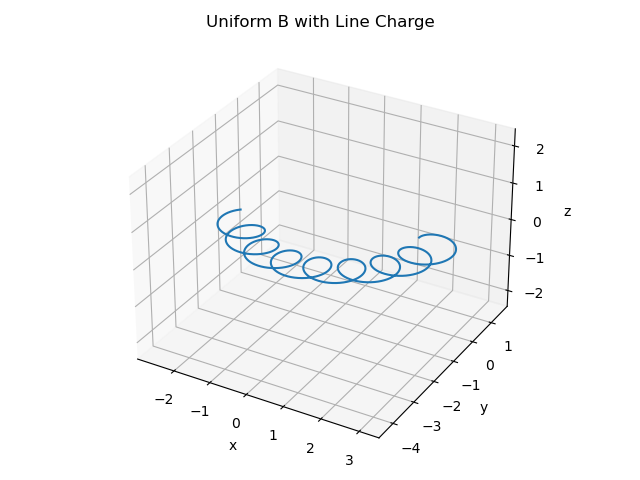

In [6]:
# Initial conditions
x0 = np.array([2.0, 0.0, 0.0])  # Initial position as a vector [x, y, z]
v0 = np.array([0.0, 1.0, 0.0])  # Initial velocity as a vector [vx, vy, vz]

# Time parameters
dt = 0.001  # Time step
num_steps = 20000  # Number of time steps

x, v, t = update_position(num_steps, dt, x0, v0, electric_field_line, magnetic_field)
plot3D(x, 'Uniform B with Line Charge')

### Exercise 3: Toroidal Coils

Consider the magnetic field produced by a toroidal coil system; this coil consists of a single wire threading the hole of a torus (donut) $N$ times with the $N$ turns evenly arranged around the circumference of the torus. Use Ampere’s law to show that the magnetic field is in the toroidal direction and has the form
$$
\mathbf{B} = \dfrac{\mu_0 NI}{2 \pi r} \hat{\phi}
$$
where $N$ is the total number of turns in the coil and $I$ is the current through the turn. What are the drifts for a particle having finite initial velocities both parallel and perpendicular to this toroidal field.

In [7]:
def electric_field_none(x, t):
    # zero E field
    return np.array([0,0,0])

def magnetic_field_toroidal(x, t):
    # B in toroidal direction
    Bx = -x[1]/(2*np.pi*(x[0]**2+x[1]**2)**(3/2))
    By = x[0]/(2*np.pi*(x[0]**2+x[1]**2)**(3/2))
    Bz = 0
    return 10*np.array([Bx, By, Bz])

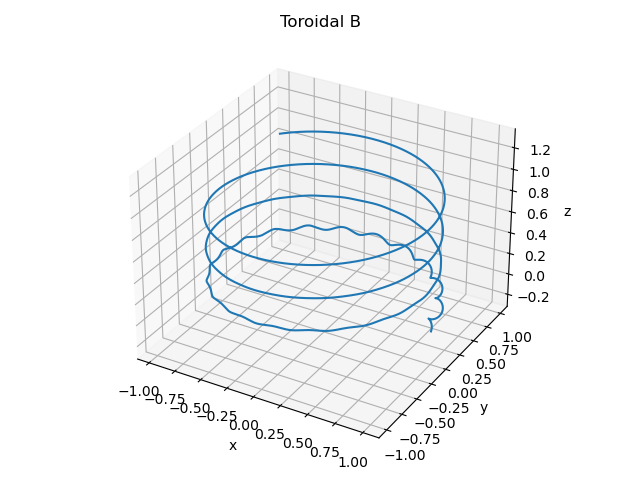

In [8]:
# Initial conditions
x0 = np.array([1.0, 0.0, 0.0])  # Initial position as a vector [x, y, z]
v0 = np.array([0.0, 0.2, 0.2])  # Initial velocity as a vector [vx, vy, vz]

# Time parameters
dt = 0.01  # Time step
num_steps = 10000  # Number of time steps

x, v, t = update_position(num_steps, dt, x0, v0, electric_field_none, magnetic_field_toroidal)
plot3D(x, 'Toroidal B')

### Exercise 4: Magnetic Mirrors

A "magnetic mirror" field in cylindrical coordinates $r, \theta, z$ can be expressed as 

$$\mathbf{B}=(2 \pi)^{-1} \nabla \psi \times \nabla \theta$$ 

where

$$\psi=B_0 \pi r^2\left(1+\left(\dfrac{z}{L}\right)^2\right)$$

where $L$ is a characteristic length. 

Sketch by hand the field line pattern in the $r, z$ plane and write out the components of B.

What are appropriate characteristic lengths, times, and velocities for an electron in this configuration? Use $r=\left(x^2+y^2\right)^{1 / 2}$ and numerically integrate the orbit of an electron starting at $x=0, y=L, z=0$ with initial velocity $v_x=0$ and initial $v_y, v_z$ of the order of the characteristic velocity (try different values). Simultaneously plot the motion in the $z, y$ plane and in the $x, y$ plane. What interesting phenomena can be observed (e.g., reflection)? Does the electron stay on a constant $\psi$ contour?

### Derivation

$$
\begin{align*}
\nabla \psi &= \frac{\partial \psi}{\partial r} \hat{r} + \frac{\partial \psi}{\partial z} \hat{z}\\
\nabla \psi & = 2 B_0 \pi r \left(1+\left(\dfrac{z}{L}\right)^2\right) \hat{r} + 2 B_0 \pi \frac{z}{L^2} r^2 \hat{z}\\
\mathbf{B}/B_0 &= \left(1+\left(\dfrac{z}{L}\right)^2\right) \hat{z} - \frac{z r}{L^2} \hat{r}\\ 
\end{align*}
$$

In [9]:
def electric_field_none(x, t):
    # zero E field
    return np.array([0,0,0])

def magnetic_field_mirror(x, t):
    # mirror characteristic length
    L=0.5
    # B in of magnetic mirror
    Bx = -x[2]*x[0]/L**2
    By = -x[2]*x[1]/L**2
    Bz = 1 + (x[2]/L)**2
    return 10*np.array([Bx, By, Bz])

## Plot $\psi$-contour

Text(0, 0.5, 'z')

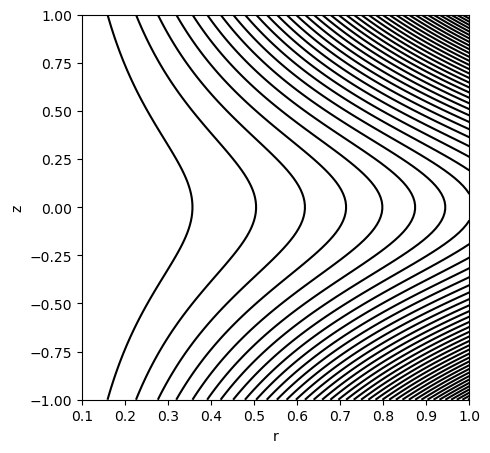

In [10]:
import numpy as np
import pylab as pl
pl.close('all')
%matplotlib inline
# domain r-z
r = np.linspace(0.1, 1, 100)
z = np.linspace(-1, 1, 100)

# meshgrid
R, Z = np.meshgrid(r, z)

L=0.5
# Flux function
psi = np.pi * R**2 * (1 + (Z/L)**2)
pl.figure(figsize=(5,5))
pl.contour(R, Z, psi, 50,colors='k')
pl.xlabel('r')
pl.ylabel('z')

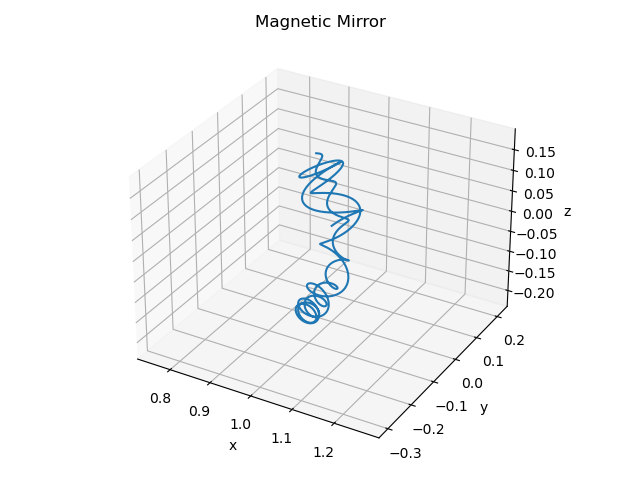

In [11]:
# Initial conditions
x0 = np.array([1.0, 0.0, 0.0])  # Initial position as a vector [x, y, z]
v0 = np.array([1,1,1])  # Initial velocity as a vector [vx, vy, vz]

# Time parameters
dt = 0.001  # Time step
num_steps = 3000  # Number of time steps

x, v, t = update_position(num_steps, dt, x0, v0, electric_field_none, magnetic_field_mirror)
plot3D(x, 'Magnetic Mirror')

### Exercise 5: Fermi Acceleration

Consider the motion of a charged particle in the magnetic field
$$
\mathbf{B}=\frac{1}{2 \pi} \nabla \psi(r, z, t) \times \nabla \theta
$$
where
$$
\psi(r, z, t)=B_{\min } \pi r^2\left[1+2 \lambda \frac{\zeta^2}{\zeta^4+1}\right]
$$
and
$$
\zeta=\frac{z}{L(t)} .
$$
Show by explicit evaluation of the flux derivatives and also by plotting contours of constant flux that this is an example of a magnetic mirror field with minimum axial field $B_{\min }$ when $z=0$ and maximum axial field $\lambda B_{\min }$ at $z=L(t)$. By making $L(t)$ a slowly decreasing function of time show that the magnetic mirrors slowly move together. Using numerical techniques to integrate the equation of motion, demonstrate Fermi acceleration of a particle when the mirrors move slowly together. Do not forget the electric field associated with the time-changing magnetic field (this electric field is closely related to the time derivative of $\psi(r, z, t)$; use Faraday's law). Plot the velocity space angle at $z=0$ for each bounce between mirrors and show that the particle becomes detrapped when this angle decreases below $\theta_{\text {trap }}=\sin ^{-1}\left(\lambda^{-1}\right)$.

Let $L(t) = L_0 (1 - \alpha t)$

#### Hint
$$
\begin{align*}
\mathbf{B} &= \frac{1}{2 \pi} \nabla \psi \times \nabla \theta\\
\mathbf{E} &= - \frac{\partial \mathbf{A}}{\partial t} \\
\mathbf{A} &= \frac{\psi}{2 \pi} \nabla \theta
\end{align*}


### Derivation

$$
\begin{align*}
\mathbf{B} &= \frac{1}{2 \pi} \nabla \psi \times \nabla \theta \\
 &= \frac{1}{2 \pi r} \left( \frac{\partial \psi}{\partial r} \hat{z} - \frac{\partial \psi}{\partial z} \hat{r} \right)\\
\frac{\partial \psi}{\partial r} &= 2 B_{\min } \pi r \left[1+2 \lambda \frac{\zeta^2}{\zeta^4+1}\right]\\
\frac{\partial \psi}{\partial z} &= - 4 B_{\min } \pi r^2 \lambda \frac{\zeta (\zeta^4 - 1)}{L (\zeta^4+1)^2}\\
B_z &= \frac{1}{2 \pi r} \frac{\partial \psi}{\partial r} = B_{\min } \left[1+2 \lambda \frac{\zeta^2}{\zeta^4+1}\right]\\
B_r &= -\frac{1}{2 \pi r} \frac{\partial \psi}{\partial z} = 2 \lambda B_{\min } \frac{r}{L} \frac{\zeta (\zeta^4 - 1)}{(\zeta^4+1)^2}\\
\end{align*}
$$

Use Faradays' Law to calculate the induced electric field

$$
\begin{align*}
\mathbf{E} &= - \frac{\partial \mathbf{A}}{\partial t} \\
&= - \frac{\partial}{\partial t} \left( \frac{\psi}{2 \pi r}\hat{\theta} \right) \\
& =\frac{1}{2 \pi r} B_{\min } \pi r^2\left[2 \lambda \frac{d}{d t}\left(\frac{\zeta^2}{\zeta^4+1}\right)\right] \hat{\theta} \\
& =B_{\min } \lambda r \frac{2 \zeta\left(1-\zeta^4\right)}{\left(\zeta^4+1\right)^2} \frac{d \zeta}{d t} \hat{\theta} \\
& = B_{\min } \lambda \alpha \dfrac{r}{L} \frac{2 \zeta^2 \left(1-\zeta^4\right)}{\left(\zeta^4+1\right)^2} \hat{\theta}
\end{align*}
$$

In [12]:
B_min = 1.0
lamb = np.sqrt(2)
alpha = 1/100

def L_length(t):
    # mirror characteristic length
    L0 = 2.0
    # L= L0 * (1 - alpha*t / tmax) # a slowly decreasing length
    L = L0 - alpha * t
    return L

def electric_field_fermi(x, t):
    # zero E field
    L= L_length(t) # a slowly decreasing length
    zeta = x[2]/L

    # B in of magnetic mirror
    r = np.sqrt(x[0]**2+x[1]**2)
    E_theta = B_min * lamb * alpha * (r / L) * 2 * zeta**2 * (1 - zeta**4) / (1 + zeta**4)**2

    Ex = - E_theta * x[1] / r
    Ey = E_theta * x[0] / r

    return np.array([Ex, Ey, 0])

def magnetic_field_fermi(x, t):
    # mirror characteristic length
    L= L_length(t) # a slowly decreasing length
    zeta = x[2]/L

    # B in of magnetic mirror
    r = np.sqrt(x[0]**2+x[1]**2)
    Br = 2 * lamb * r * zeta * (zeta**4 - 1) / (L * (1 + zeta**4)**2)
    Bx = Br * x[0] / r
    By = Br * x[1] / r
    Bz = 1 + 2*lamb*(zeta**2/(zeta**4+1))
    return B_min*np.array([Bx, By, Bz])

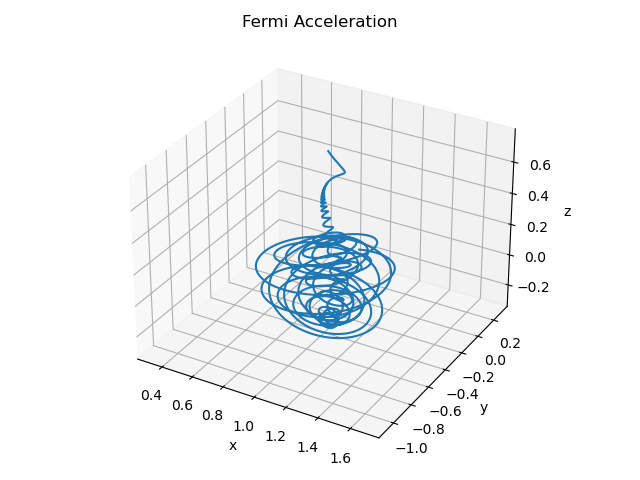

In [13]:
# Initial conditions
x0 = np.array([1.0, 0.0, 0.0])  # Initial position as a vector [x, y, z]
v0 = 1*np.array([1,0,0.2])  # Initial velocity as a vector [vx, vy, vz]

# Time parameters
dt = 0.01  # Time step
tmax = 150
num_steps = int(tmax / dt)  # Number of time steps

x, v, t = update_position(num_steps, dt, x0, v0, electric_field_fermi, magnetic_field_fermi)
plot3D(x, 'Fermi Acceleration')

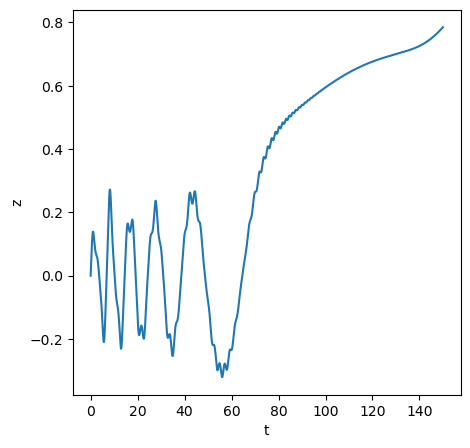

In [14]:
%matplotlib inline
pl.close('all')
pl.figure(figsize=(5,5))
pl.plot(t, x[:,2], label='z')
pl.xlabel('t')
pl.ylabel('z')
pl.show()

Text(0, 0.5, 'angle')

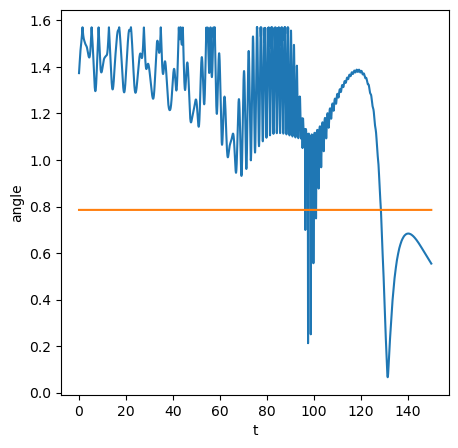

In [15]:

v_par = np.zeros(len(v))

for cnt, xi in enumerate(x):
    B = magnetic_field_fermi(xi, 0)
    v_par[cnt] = np.dot(v[cnt], B/np.linalg.norm(B))

v_perp = np.sqrt(np.linalg.norm(v, axis=1)**2 - v_par**2)

angle = np.arcsin(np.abs(v_perp)/np.linalg.norm(v, axis=1))
theta0 = np.arcsin(1/lamb)
%matplotlib inline
pl.close('all')
pl.figure(figsize=(5,5))
pl.plot(t, angle, label='angle')
pl.plot(t, theta0*np.ones(len(t)), label='$\lambda$')
pl.xlabel('t')
pl.ylabel('angle')

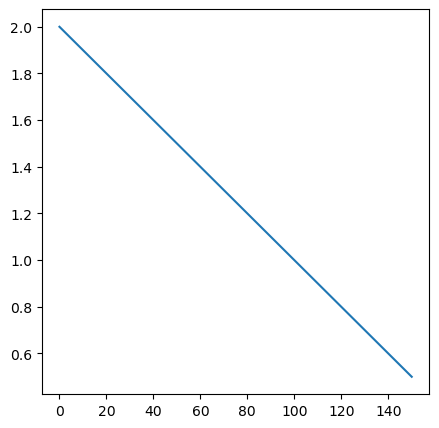

In [16]:
L= L_length(t)
pl.figure(figsize=(5,5))
pl.plot(t,L)

### Exercise 6: Particle in Wave Fields

Use the numerical Lorentz solver to calculate the motion of a charged particle in a uniform magnetic field $\mathbf{B}=B \hat{z}$ and an electric field given by 

$$
\mathbf{E} = k \phi \sin(k y - \omega t) \hat{y}
$$

Compare the motion to the predictions of drift theory ($\mathbf{E} \times \mathbf{B}$, polarization). Describe the motion for cases where $\alpha<<1, \alpha \simeq 1$, and $\alpha>>1$ where $\alpha=m k^2 \phi / q B^2$. Describe what happens when $\alpha$ becomes of order unity.

In [17]:
def electric_field_wave(x, t):
    # wave E field
    k = 1
    phi = 100
    omega = 1

    Ey = k*phi*np.sin(k*x[1]-omega*t)
    return np.array([0,Ey,0])

def magnetic_field_uniform(x, t):
    # uniform B field
    return np.array([0, 0, 1])

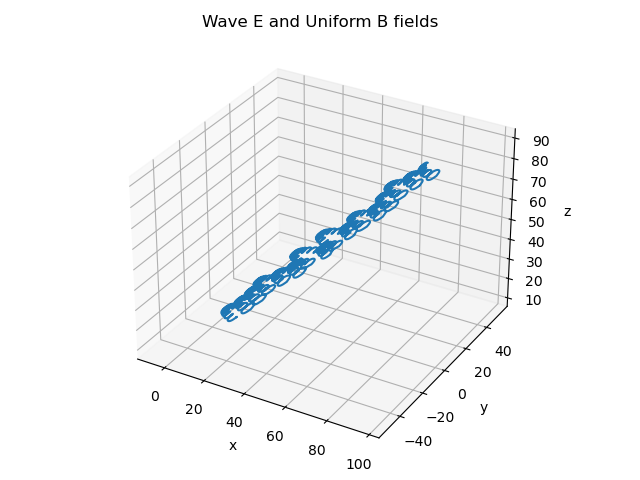

In [18]:
# Initial conditions
x0 = np.array([0.0, 0.0, 0.0])  # Initial position as a vector [x, y, z]
v0 = np.array([1.0, 1.0, 1.0])  # Initial velocity as a vector [vx, vy, vz]

# Time parameters
dt = 0.01  # Time step
num_steps = 10000  # Number of time steps

x, v, t = update_position(num_steps, dt, x0, v0, electric_field_wave, magnetic_field_uniform)
plot3D(x, 'Wave E and Uniform B fields')

## create figure for front page


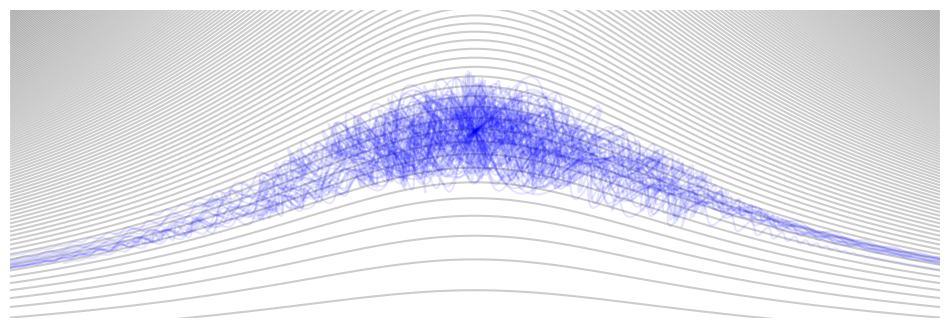

In [52]:
import numpy as np
import pylab as pl
pl.close('all')
%matplotlib inline

# set random seed
np.random.seed(0)

# domain r-z
r = np.linspace(0, 1, 100)
z = np.linspace(-1, 1, 100)

# meshgrid
R, Z = np.meshgrid(r, z)

L = 0.5
# Flux function
psi = np.pi * R**2 * (1 + (Z/L)**2)

pl.figure(figsize=(12, 4))

pl.contour(Z, R, psi, 200,colors='k', alpha= 0.2)
# pl.xlabel('r')
# pl.ylabel('z')

# Initial conditions
x0 = np.array([0.5, 0.0, 0.0])  # Initial position as a vector [x, y, z]
v0 = np.array([1,1,1])  # Initial velocity as a vector [vx, vy, vz]

# Time parameters
dt = 0.001  # Time step
num_steps = 3000  # Number of time steps
num_particles = 100

for i in range(num_particles):
    v0 = 3 * (np.random.rand(3) - 0.5)
    x, v, t = update_position(num_steps, dt, x0, v0, electric_field_none, magnetic_field_mirror)
    pl.plot(x[:,2], x[:,0], color='b', alpha=0.1)

# plot x in r-z plane
# pl.figure(figsize=(5,5))
# pl.plot(x[:,2], x[:,0])
# pl.xlabel('r')
pl.xlim(-1, 1)
pl.ylim(0.1, 0.76)
pl.axis('off')
pl.savefig('chap3-magnetic_mirror.png', dpi=300, bbox_inches='tight')


In [37]:
v0 = np.random.rand(3)
v0

array([0.55840081, 0.47342031, 0.73638189])